#Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.16.1


#Data Preprocessing

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'archive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\willi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9265 - loss: 0.2422 - val_accuracy: 0.9516 - val_loss: 0.2454
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9328 - loss: 0.2233 - val_accuracy: 0.9487 - val_loss: 0.2399
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9471 - loss: 0.1884 - val_accuracy: 0.9430 - val_loss: 0.2449
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9473 - loss: 0.1733 - val_accuracy: 0.9487 - val_loss: 0.3407
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9358 - loss: 0.2193 - val_accuracy: 0.9288 - val_loss: 0.3570
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.9311 - loss: 0.2497 - val_accuracy: 0.9487 - val_loss: 0.2146
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.9472 - loss: 0.1712 - val_accuracy: 0.9402 - val_loss: 0.3172
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.9290 - loss: 0.2858 - val_accu

##Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9927 - loss: 0.0177
Training accuracy: 0.9919742941856384


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9708 - loss: 0.1806
Validation accuracy: 0.9572649598121643


##Saving Model

In [21]:
cnn.save('trained_model.h5')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.9245585799217224,
  0.9351524710655212,
  0.9512038230895996,
  0.9428571462631226,
  0.9316211938858032,
  0.9393258690834045,
  0.9492776989936829,
  0.9232744574546814,
  0.9457463622093201,
  0.9470304846763611,
  0.932584285736084,
  0.9621188044548035,
  0.9569823145866394,
  0.965008020401001,
  0.9444622993469238,
  0.9512038230895996,
  0.9274478554725647,
  0.9505618214607239,
  0.9512038230895996,
  0.96372389793396,
  0.9611557126045227,
  0.9582664370536804,
  0.9573033452033997,
  0.9393258690834045,
  0.9579454064369202,
  0.9560192823410034,
  0.9634028673171997,
  0.9560192823410034,
  0.9434992074966431,
  0.9576243758201599,
  0.9537720680236816,
  0.96982342004776],
 'loss': [0.25215598940849304,
  0.22238901257514954,
  0.16494542360305786,
  0.18345743417739868,
  0.23659852147102356,
  0.21297761797904968,
  0.18087828159332275,
  0.2936154901981354,
  0.18717938661575317,
  0.1733849048614502,
  0.22654925286769867,
  0.14525382220745087,
  0.136

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [25]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.72649598121643 %


#Accuracy Visualization

##Training Visualization

In [26]:
training_history.history['accuracy']

[0.9245585799217224,
 0.9351524710655212,
 0.9512038230895996,
 0.9428571462631226,
 0.9316211938858032,
 0.9393258690834045,
 0.9492776989936829,
 0.9232744574546814,
 0.9457463622093201,
 0.9470304846763611,
 0.932584285736084,
 0.9621188044548035,
 0.9569823145866394,
 0.965008020401001,
 0.9444622993469238,
 0.9512038230895996,
 0.9274478554725647,
 0.9505618214607239,
 0.9512038230895996,
 0.96372389793396,
 0.9611557126045227,
 0.9582664370536804,
 0.9573033452033997,
 0.9393258690834045,
 0.9579454064369202,
 0.9560192823410034,
 0.9634028673171997,
 0.9560192823410034,
 0.9434992074966431,
 0.9576243758201599,
 0.9537720680236816,
 0.96982342004776]

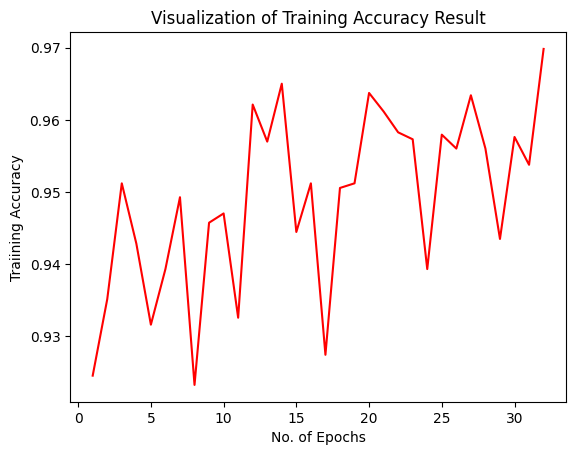

In [27]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

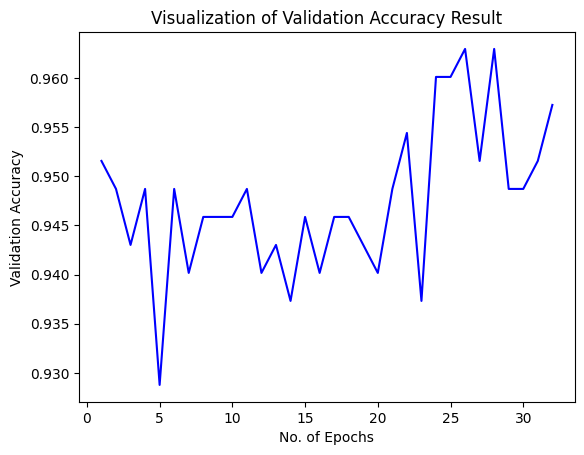

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [30]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9663 - loss: 0.2308
Test accuracy: 0.9582172632217407
